# Data Preparation


In [25]:
# --------------------------------------------------------------------------------------------------------
# dataprep.ipynb -- data preparation, inspection, and visualization 
# --------------------------------------------------------------------------------------------------------
# 0.01|02.01.22|AB|migration and minority languages data
# --------------------------------------------------------------------------------------------------------

# initialize

import numpy as np
import pandas as pd
#import glob
#import os
import matplotlib.pyplot as plt

#from datetime import datetime, date 
import re # regular expression
#import warnings

import seaborn as sns
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
#from statsmodels.tsa.api import SARIMAX
#from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
#from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
#from itertools import product  
#from tqdm import tqdm_notebook
#import pickle

# %matplotlib inline
# %matplotlib notebook

PATH_DATA = r'../../data/'
INTERACTIVE = True

if INTERACTIVE:
    %matplotlib notebook
else:
    %matplotlib inline
    

## CIA Fact Book

## Immigration

_Total number of long-term immigrants arriving into the reporting country during the reference year_

- information about data availabilty
https://ec.europa.eu/eurostat/web/main/data/database?p_p_id=NavTreeportletprod_WAR_NavTreeportletprod_INSTANCE_nPqeVbPXRmWQ&p_p_lifecycle=0&p_p_state=pop_up&p_p_mode=view&_NavTreeportletprod_WAR_NavTreeportletprod_INSTANCE_nPqeVbPXRmWQ_nodeInfoService=true&nodeId=-9012

- meta data: N/A
Last data update: 	27/04/2021  23:00 (8 months ago)
Overall data coverage: 	2008 — 2019
Source data set: https://ec.europa.eu/eurostat/databrowser/product/view/MIGR_IMM1CTZ

for each European country (35), #immigrants for 2008-2019
special cases: ":" missing; b, bp, p, e, ep -- estimated...? -- belong to previous value
two sets: agedef=COMPLET and REACH
- NO languages, no source country

In [2]:
fileName = PATH_DATA + 'tps00176.tsv'
print(fileName)
# header = 1st line; missing value indicated by colon (followed by a space)
immigrationData = pd.read_csv(fileName, sep='\t', na_values=[': '], header=0) 


../../data/tps00176.tsv


In [3]:
immigrationData

,"citizen,agedef,age,unit,sex,geo\time",2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"TOTAL,COMPLET,TOTAL,NR,T,AT",73772,69295,70978,82230,91557,101866,116262,166323,129509,111801,105633,109167
1,"TOTAL,COMPLET,TOTAL,NR,T,BE",NaN,NaN,135281 b,147377 b,129477,120078,123158,146626,123702,126703,137860,150006
2,"TOTAL,COMPLET,TOTAL,NR,T,BG",NaN,NaN,NaN,NaN,14103 bp,18570 p,26615 p,25223 p,21241,25597 p,29559 p,37929 p
3,"TOTAL,COMPLET,TOTAL,NR,T,CH",184297,160623,161778,148799 b,149051,160157,156282,153627,149305,143377,144857,145129
4,"TOTAL,COMPLET,TOTAL,NR,T,CY",21060,22581 b,20206,23037,17476,13149,9212,15183,17391,21306,23442,26170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,"TOTAL,REACH,TOTAL,NR,T,RO",138929 b,135844,149885,147685,167266,153646,136035,132795 e,137455,177435 e,172578 e,202422 e
64,"TOTAL,REACH,TOTAL,NR,T,SE",101171,102280,98801,96467,103059,115845,126966,134240,163005,144489,132602,115805
65,"TOTAL,REACH,TOTAL,NR,T,SI",30693 b,30296,15416,14083,15022,13871,13846,15420,16623,18808,28455,31319
66,"TOTAL,REACH,TOTAL,NR,T,SK",8765,6346,5272,4829,5419 p,5149 p,5357 p,6997 p,7686 p,7188 p,7253 p,7016 p


First column defines content of time series. 
There are two sets: agedef = COMPLET (age in completed years) and REACH (age reached during the year), resp. 
In each group, there is a row for each country of the European Union (last two letters of 1st column).
Since age is no criterion, the two sets are equal and only the first half of the dat is considered.

In [4]:
# remove duplicates and transform first column (keep only country code)

keepNRows = immigrationData.shape[0] // 2 # keep first half of table (68 -> 34)
immigrationData = immigrationData.iloc[0:keepNRows, ]

# keep last two characters (country code) -> new first column 'country'
immigrationData.insert(0, 'country', immigrationData.iloc[ : , 0].apply(lambda s: s[-2: ])) 
immigrationData

,country,"citizen,agedef,age,unit,sex,geo\time",2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,AT,"TOTAL,COMPLET,TOTAL,NR,T,AT",73772,69295,70978,82230,91557,101866,116262,166323,129509,111801,105633,109167
1,BE,"TOTAL,COMPLET,TOTAL,NR,T,BE",NaN,NaN,135281 b,147377 b,129477,120078,123158,146626,123702,126703,137860,150006
2,BG,"TOTAL,COMPLET,TOTAL,NR,T,BG",NaN,NaN,NaN,NaN,14103 bp,18570 p,26615 p,25223 p,21241,25597 p,29559 p,37929 p
3,CH,"TOTAL,COMPLET,TOTAL,NR,T,CH",184297,160623,161778,148799 b,149051,160157,156282,153627,149305,143377,144857,145129
4,CY,"TOTAL,COMPLET,TOTAL,NR,T,CY",21060,22581 b,20206,23037,17476,13149,9212,15183,17391,21306,23442,26170
5,CZ,"TOTAL,COMPLET,TOTAL,NR,T,CZ",108267 b,75620,48317,27114 b,34337,30124 b,29897,29602,64083,51847,65910,105888
6,DE,"TOTAL,COMPLET,TOTAL,NR,T,DE",682146,346216 b,404055,489422,592175,692713,884893 e,1571047 e,1029852 b,917109 be,893886 be,886341 be
7,DK,"TOTAL,COMPLET,TOTAL,NR,T,DK",57357 b,51800,52236,52833,54409,60312,68388,78492,74383,68579,64669,61384
8,EE,"TOTAL,COMPLET,TOTAL,NR,T,EE",3671,3884,2810,3709,2639,4109,3904,15413 b,14822,17616,17547,18259
9,EL,"TOTAL,COMPLET,TOTAL,NR,T,EL",66529,58613,60462,60089 b,58200,57946,59013,64446 b,116867 b,112247,119489,129459


In [5]:
# drop second column
colName = immigrationData.columns[1] 
immigrationData.pop(colName)
immigrationData

,country,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,AT,73772,69295,70978,82230,91557,101866,116262,166323,129509,111801,105633,109167
1,BE,NaN,NaN,135281 b,147377 b,129477,120078,123158,146626,123702,126703,137860,150006
2,BG,NaN,NaN,NaN,NaN,14103 bp,18570 p,26615 p,25223 p,21241,25597 p,29559 p,37929 p
3,CH,184297,160623,161778,148799 b,149051,160157,156282,153627,149305,143377,144857,145129
4,CY,21060,22581 b,20206,23037,17476,13149,9212,15183,17391,21306,23442,26170
5,CZ,108267 b,75620,48317,27114 b,34337,30124 b,29897,29602,64083,51847,65910,105888
6,DE,682146,346216 b,404055,489422,592175,692713,884893 e,1571047 e,1029852 b,917109 be,893886 be,886341 be
7,DK,57357 b,51800,52236,52833,54409,60312,68388,78492,74383,68579,64669,61384
8,EE,3671,3884,2810,3709,2639,4109,3904,15413 b,14822,17616,17547,18259
9,EL,66529,58613,60462,60089 b,58200,57946,59013,64446 b,116867 b,112247,119489,129459


In [6]:
if False:
    # remove trailing spaces from year column names  **** or better convert to integer 
    #                                                    -> next chunk
    immigrationData.columns.values # note year columns end with a space
    # delete them and convert to integer
    newColumnNames = list(immigrationData.columns.map(lambda s: s.strip())) 
    immigrationData.columns = newColumnNames   # note: inplace

In [7]:
# convert year column names to integer 
yearColumns = range(2008,2020) # "*" unpacks range
newColumnNames = list(["country", *yearColumns])  
#print(newColumnNames)
immigrationData.columns = newColumnNames
# immigrationData.columns.values 

In [8]:
# immigrationData["country"]
immigrationData[yearColumns]

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,73772,69295,70978,82230,91557,101866,116262,166323,129509,111801,105633,109167
1,NaN,NaN,135281 b,147377 b,129477,120078,123158,146626,123702,126703,137860,150006
2,NaN,NaN,NaN,NaN,14103 bp,18570 p,26615 p,25223 p,21241,25597 p,29559 p,37929 p
3,184297,160623,161778,148799 b,149051,160157,156282,153627,149305,143377,144857,145129
4,21060,22581 b,20206,23037,17476,13149,9212,15183,17391,21306,23442,26170
5,108267 b,75620,48317,27114 b,34337,30124 b,29897,29602,64083,51847,65910,105888
6,682146,346216 b,404055,489422,592175,692713,884893 e,1571047 e,1029852 b,917109 be,893886 be,886341 be
7,57357 b,51800,52236,52833,54409,60312,68388,78492,74383,68579,64669,61384
8,3671,3884,2810,3709,2639,4109,3904,15413 b,14822,17616,17547,18259
9,66529,58613,60462,60089 b,58200,57946,59013,64446 b,116867 b,112247,119489,129459


Missing values are indicated by a colon. 
Numbers may be accompanied by a 1- or 2-letter code with the following meaning:

- b: break in time series
- bp: break in time series, provisional
- p: provisional
- e: estimated
- ep: estimated, provisional

For the purpose of this study, this information is ignored and hence the characters removed, facilitating conversion of the data to numeric.

In [26]:
# immigrationData.replace("[a-z]+", "", regex=True, inplace=True) # warning (could be ignored)
immigrationData = immigrationData.replace("[a-z]+", "", regex=True, inplace=False) # alternative
# immigrationData

In [10]:
# -- Missing Values

print("Count missing values per year:")
print(immigrationData.isna().sum())

Count missing values per year:
country    0
2008       3
2009       3
2010       1
2011       1
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
dtype: int64


In [11]:
immigrationData.dtypes # all object -> convert to numeric
# convert all year columns of DataFrame (and ignore errors caused by country)
immigrationData = immigrationData.apply(pd.to_numeric, errors='ignore')
# immigrationData

In [12]:
# imputation: linear
immigrationDataImputed = immigrationData.interpolate(method = 'linear', limit_direction = 'both', axis = 0)

In [13]:
# year columns become attribute (pivoting wide to long -> melt())
# key is country (for each year and country, a row is to be created)
# use the year columns for the value column 

immigrationData = immigrationDataImputed.melt(['country'], value_vars = yearColumns, var_name = 'year', 
                                              value_name = 'nImmigrants') 

In [14]:
# -- create an index
#immigrationData.set_index(['year', 'country'], inplace = True)
immigrationData.set_index(['year'], inplace = True)

<IPython.core.display.Javascript object>


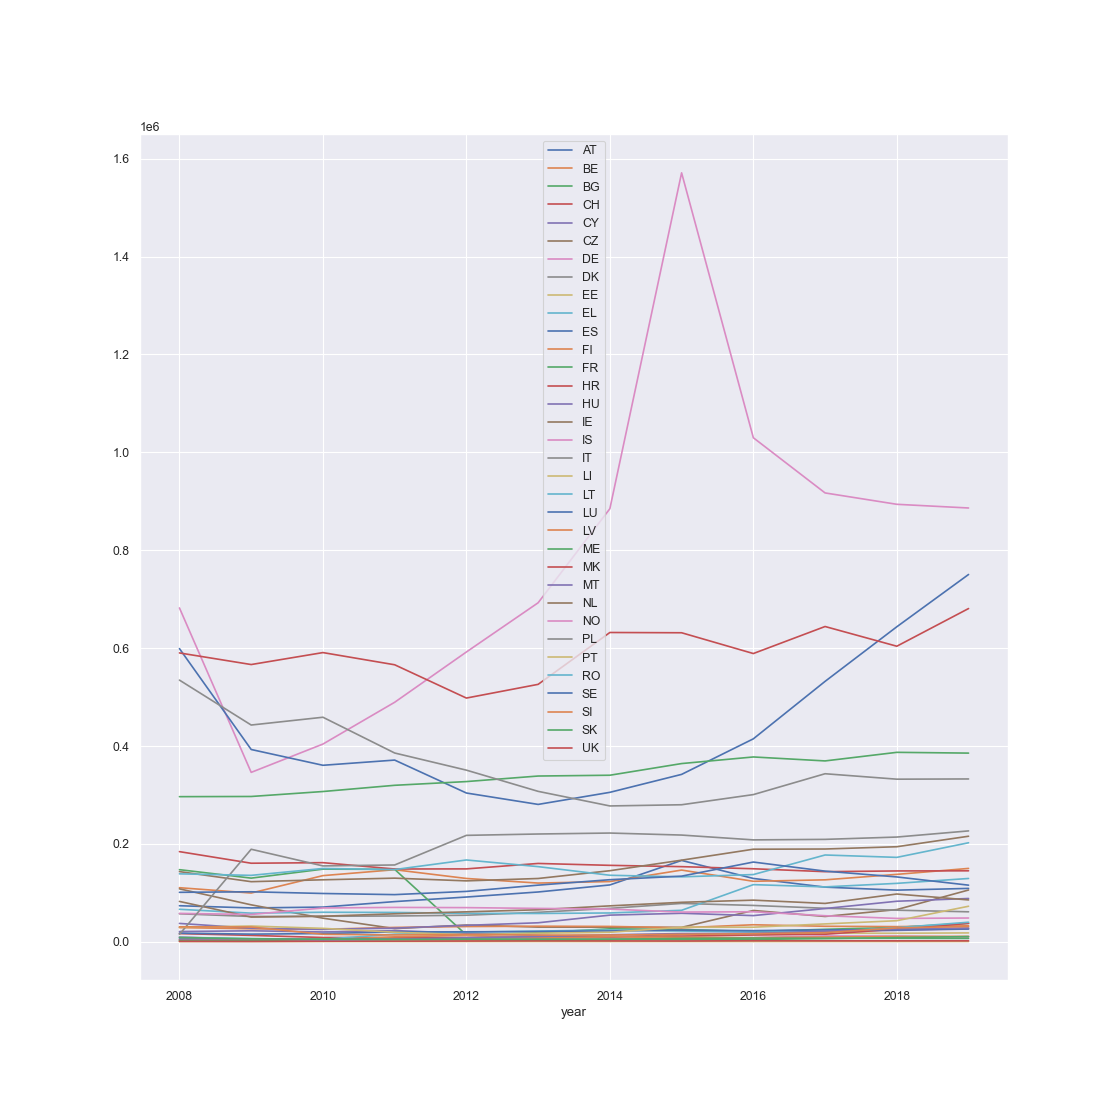

In [31]:
# -- plot timeseries ----
sns.set()
# 1 plot per country:
# _ = immigrationData.groupby('country').plot(figsize = [14,20]) 
# all countries in 1 plot:
_ = immigrationData.groupby('country')['nImmigrants'].plot(figsize = [14,14], legend=True) 

<IPython.core.display.Javascript object>


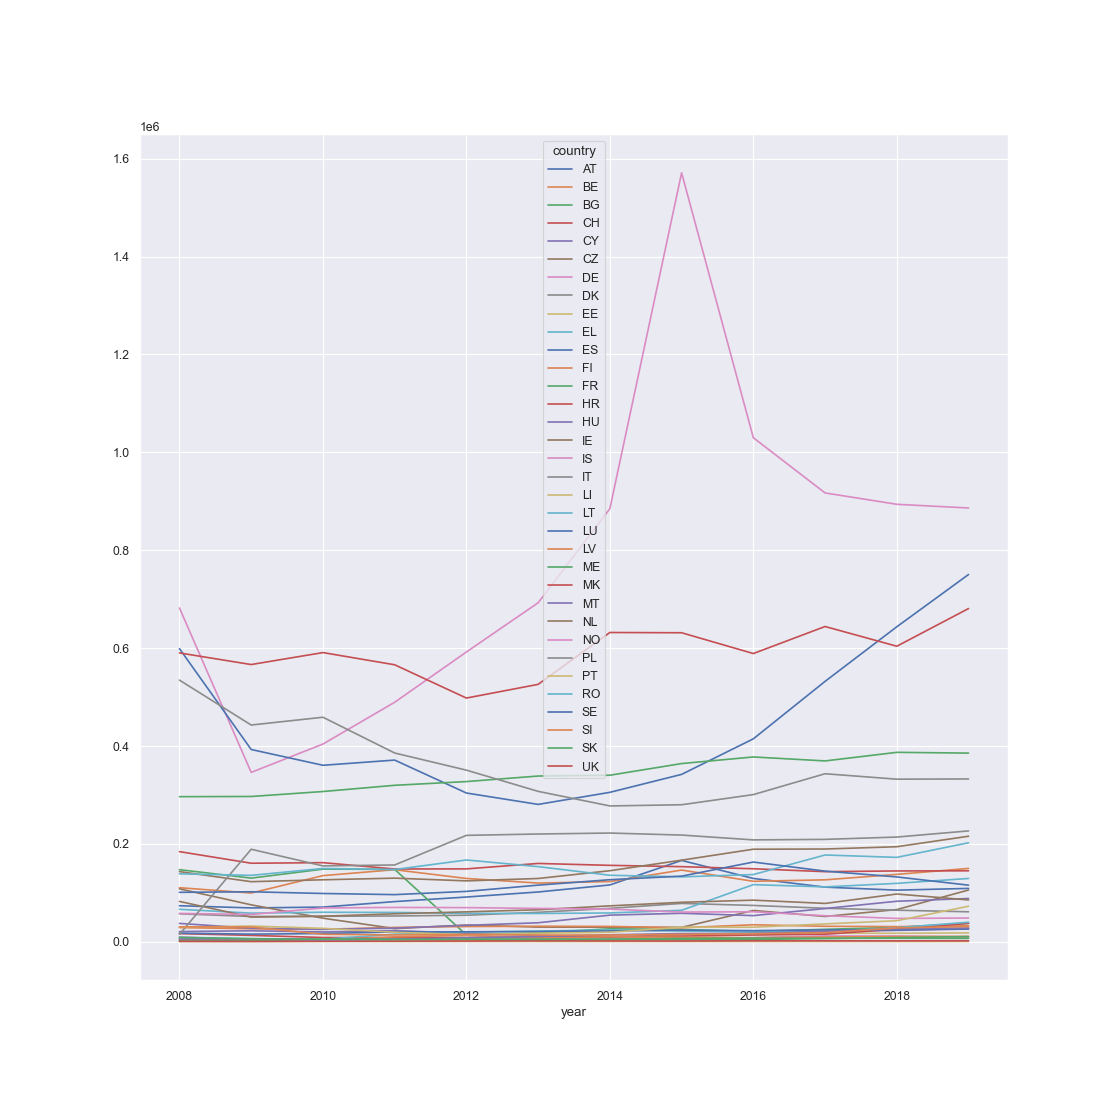

In [32]:
# alternative: 1 col/country
_= immigrationData.pivot(columns='country', values='nImmigrants').plot(figsize = [14,14])

In [17]:
if False:
    immigrationData.reset_index(inplace=True)
    immigrationData

## Population
2010-2021

agedef as above

In [18]:
"tps00001.tsv"
"tps00002.tsv"

'tps00002.tsv'

## Citizenship
2008-2019 bzw. 2009-2020

In [19]:
"tps00024.tsv"
"tps00157.tsv"

'tps00157.tsv'